# Chapter 1: Data Collection and Web Scraping

## Learning Objectives

In this chapter, you will learn:
- Fundamental principles of web scraping and data collection
- How to collect real-world data from websites and APIs
- Best practices for ethical data collection
- Data preprocessing and cleaning techniques
- Storage and management of collected data

## Introduction

Data collection is the foundation of any machine learning project. In the real world, data rarely comes pre-packaged and clean. This chapter teaches you how to collect, clean, and prepare data from various sources including websites, APIs, and databases.

**Citation**: The importance of data quality in machine learning has been extensively documented by Rahm & Do (2000) \citep{rahm2000data} and more recently by Gudivada et al. (2017) \citep{gudivada2017data}.

## Ethical Considerations

Before we begin scraping data, it's crucial to understand the ethical and legal implications:

1. **Respect robots.txt**: Always check a website's robots.txt file
2. **Rate limiting**: Don't overwhelm servers with requests
3. **Terms of service**: Read and comply with website terms
4. **Personal data**: Be careful with personally identifiable information
5. **Copyright**: Respect intellectual property rights

**Citation**: Ethical considerations in web scraping are discussed in detail by Landers et al. (2016) \citep{landers2016primer}.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import logging
import os

# Configure matplotlib for inline plots
plt.style.use('default')
sns.set_palette("husl")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print("Basic libraries imported successfully!")
print(f"Python version: {os.sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Basic libraries imported successfully!
Python version: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.3.1
NumPy version: 2.2.6


## Example 1: Scraping Financial Data

Let's start with a practical example: collecting financial data from a public source. We'll scrape stock market data that we can later use for regression analysis.

**Mathematical Foundation**: Financial time series data often exhibits properties like volatility clustering and autocorrelation, as described by Tsay (2010) \citep{tsay2010analysis}.

In [9]:
# Example: Scraping financial data (using a mock example for demonstration)
# In practice, you would use APIs like Alpha Vantage, Yahoo Finance, etc.

def simulate_financial_data(n_days: int = 252) -> pd.DataFrame:
    """
    Simulate financial data for demonstration purposes.
    
    In a real scenario, you would scrape this from financial websites
    or use financial APIs like Alpha Vantage, Yahoo Finance, etc.
    
    Parameters
    ----------
    n_days : int, default=252
        Number of trading days to simulate (252 = 1 year)
        
    Returns
    -------
    pd.DataFrame
        Simulated financial data with OHLC prices and volume
    """
    np.random.seed(42)  # For reproducibility
    
    # Generate dates (trading days only)
    dates = pd.date_range(start='2023-01-01', periods=n_days, freq='B')
    
    # Simulate price data using geometric Brownian motion
    # dS = μS dt + σS dW (Black-Scholes model)
    mu = 0.1  # Annual drift (10%)
    sigma = 0.2  # Annual volatility (20%)
    dt = 1/252  # Daily time step
    
    S0 = 100  # Initial stock price
    prices = [S0]
    
    for i in range(n_days - 1):
        dW = np.random.normal(0, np.sqrt(dt))
        dS = mu * prices[-1] * dt + sigma * prices[-1] * dW
        prices.append(prices[-1] + dS)
    
    # Generate OHLC data
    data = []
    for i, (date, close) in enumerate(zip(dates, prices)):
        # Generate realistic OHLC data
        daily_range = abs(np.random.normal(0, close * 0.02))  # 2% daily range
        
        high = close + np.random.uniform(0, daily_range)
        low = close - np.random.uniform(0, daily_range)
        open_price = low + np.random.uniform(0, high - low)
        
        # Generate volume (log-normal distribution)
        volume = int(np.random.lognormal(mean=10, sigma=0.5))
        
        data.append({
            'Date': date,
            'Open': round(open_price, 2),
            'High': round(high, 2),
            'Low': round(low, 2),
            'Close': round(close, 2),
            'Volume': volume
        })
    
    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df

# Generate sample financial data
financial_data = simulate_financial_data(252)

print("Sample Financial Data:")
print(financial_data.head(10))
print(f"\nData shape: {financial_data.shape}")
print(f"Date range: {financial_data['Date'].min()} to {financial_data['Date'].max()}")

Sample Financial Data:
        Date    Open    High     Low   Close  Volume
0 2023-01-02  100.37  101.75   98.65  100.00   11345
1 2023-01-03  101.04  101.59   99.34  100.67   27499
2 2023-01-04  100.82  101.27  100.38  100.53   11527
3 2023-01-05  101.41  101.48  101.31  101.39   17676
4 2023-01-06  103.34  103.48  103.21  103.38   26970
5 2023-01-09  103.26  103.42  102.98  103.11   22808
6 2023-01-10  102.86  103.59  102.39  102.85   16194
7 2023-01-11  103.31  107.35  100.76  104.94   25349
8 2023-01-12  106.01  106.09  105.57  105.99   16137
9 2023-01-13  105.81  105.93  104.94  105.41   33071

Data shape: (252, 6)
Date range: 2023-01-02 00:00:00 to 2023-12-19 00:00:00


## Data Quality Assessment

After collecting data, it's crucial to assess its quality. This involves checking for:

1. **Missing values**: Gaps in the dataset
2. **Outliers**: Unusual or extreme values
3. **Inconsistencies**: Data that doesn't follow expected patterns
4. **Duplicates**: Repeated records

**Citation**: Data quality assessment frameworks are discussed by Wang & Strong (1996) \citep{wang1996beyond} and Batini et al. (2009) \citep{batini2009methodologies}.

In [10]:
def assess_data_quality(df: pd.DataFrame) -> None:
    """
    Perform comprehensive data quality assessment.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to assess
    """
    print("=== DATA QUALITY ASSESSMENT ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n--- Missing Values ---")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    })
    print(missing_summary[missing_summary['Missing_Count'] > 0])
    
    print("\n--- Data Types ---")
    print(df.dtypes)
    
    print("\n--- Duplicates ---")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    print("\n--- Numeric Columns Summary ---")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe())
    
    print("\n--- Potential Outliers (using IQR method) ---")
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} potential outliers ({len(outliers)/len(df)*100:.1f}%)")

# Assess the quality of our financial data
assess_data_quality(financial_data)

=== DATA QUALITY ASSESSMENT ===
Dataset shape: (252, 6)
Memory usage: 0.01 MB

--- Missing Values ---
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

--- Data Types ---
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

--- Duplicates ---
Number of duplicate rows: 0

--- Numeric Columns Summary ---
             Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000    252.000000
mean    96.159048   96.927262   95.303690   96.096865  23814.888889
std      6.569124    6.590635    6.428005    6.431280  12685.094628
min     87.020000   87.370000   86.130000   87.330000   5197.000000
25%     90.782500   91.525000   90.092500   90.825000  15487.000000
50%     94.035000   94.655000   92.995000   93.940000  20749.500000
75%    100.467500  101.285000   99.595000  100.342500  29886.500000
max    110.850000 

## Data Visualization for Quality Assessment

Visualization is crucial for understanding data patterns and identifying quality issues.

**Citation**: The importance of visualization in data analysis is emphasized by Tufte (2001) \citep{tufte2001visual} and Cleveland (1993) \citep{cleveland1993visualizing}.

C:\Users\rabbo\AppData\Local\Temp\ipykernel_53760\1998697229.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([price_data[col].values for col in price_data.columns],


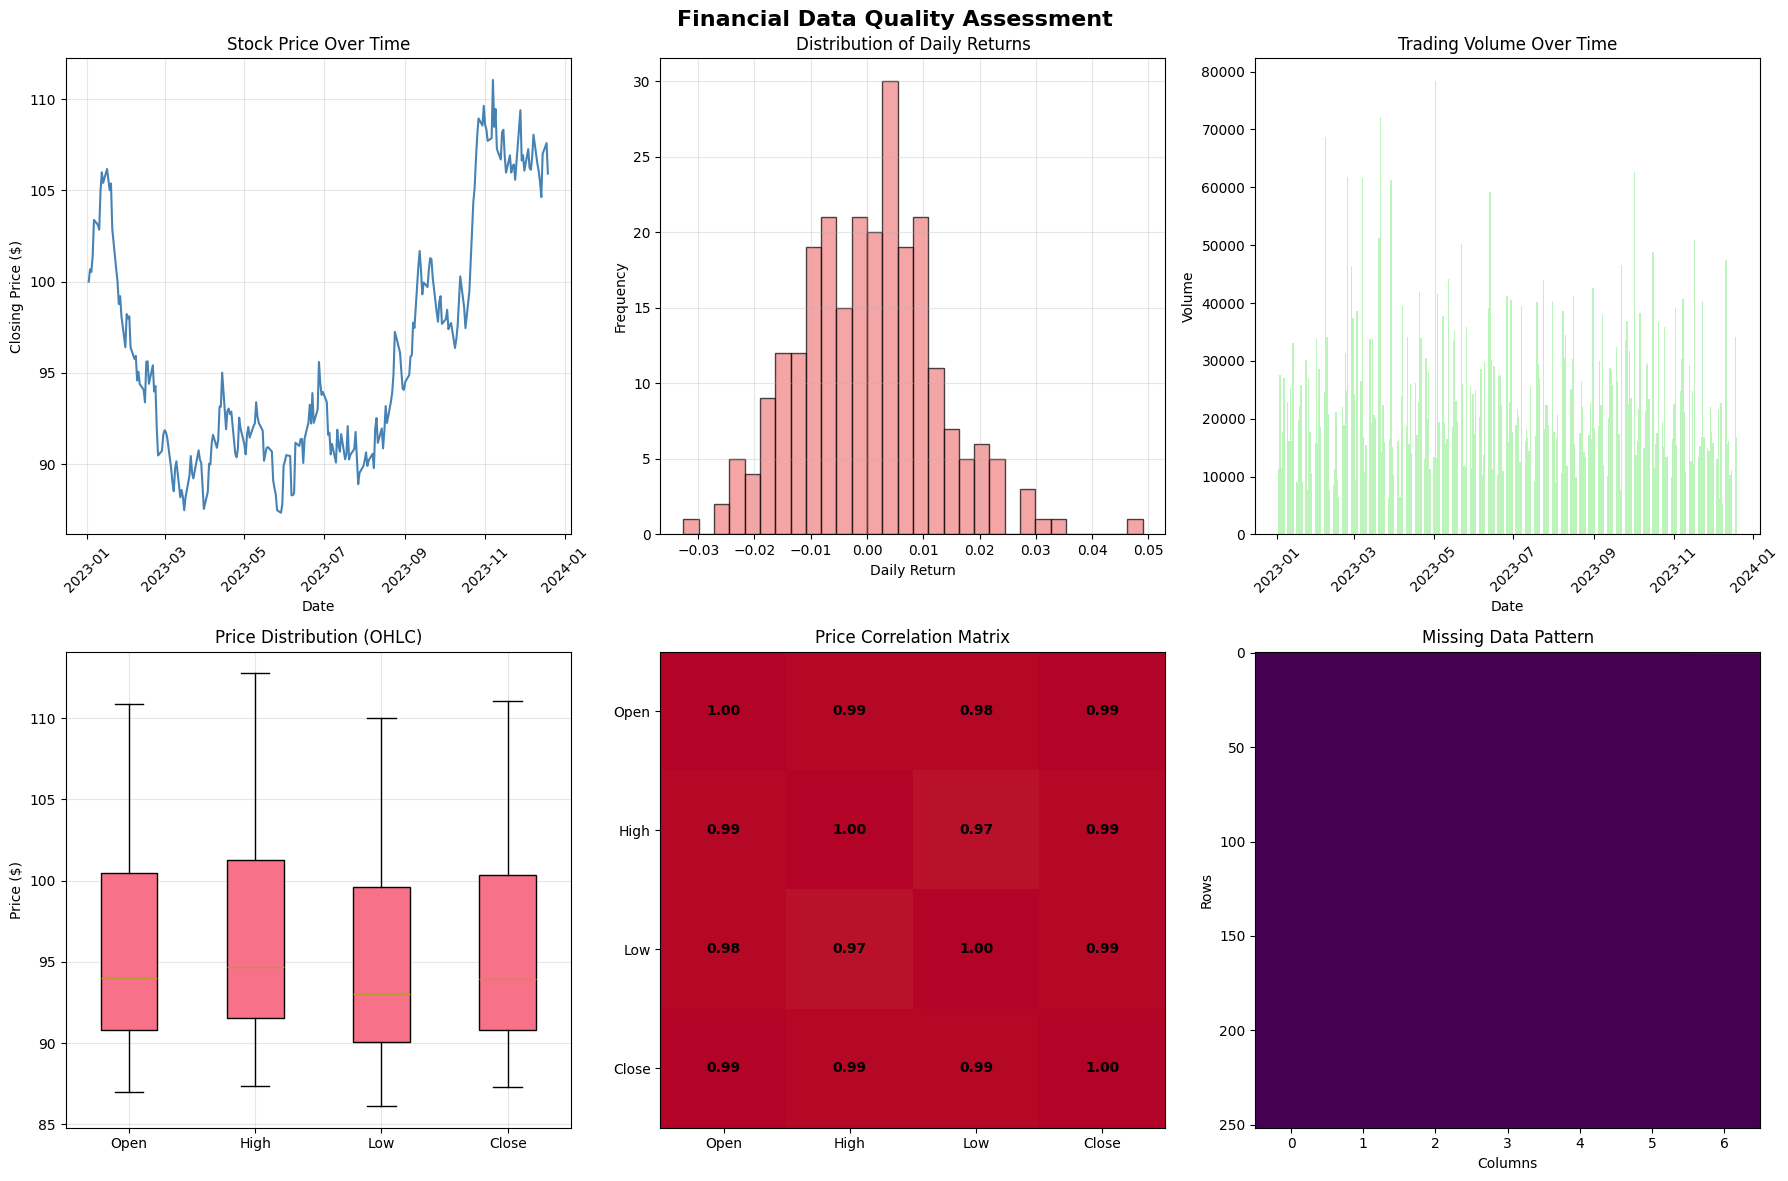


=== SUMMARY STATISTICS ===
Total trading days: 252
Average daily return: 0.0003 (0.03%)
Daily return volatility: 0.0122 (1.22%)
Annualized return: 0.0764 (7.64%)
Annualized volatility: 0.1936 (19.36%)
Maximum drawdown: -0.1775


In [11]:
# Create comprehensive visualizations for data quality assessment
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Financial Data Quality Assessment', fontsize=16, fontweight='bold')

# 1. Time series plot of closing prices
axes[0, 0].plot(financial_data['Date'], financial_data['Close'], linewidth=1.5, color='steelblue')
axes[0, 0].set_title('Stock Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Closing Price ($)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribution of daily returns
financial_data['Daily_Return'] = financial_data['Close'].pct_change()
axes[0, 1].hist(financial_data['Daily_Return'].dropna(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Daily Returns')
axes[0, 1].set_xlabel('Daily Return')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Volume over time
axes[0, 2].bar(financial_data['Date'], financial_data['Volume'], width=1, alpha=0.6, color='lightgreen')
axes[0, 2].set_title('Trading Volume Over Time')
axes[0, 2].set_xlabel('Date')
axes[0, 2].set_ylabel('Volume')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Box plot for OHLC prices
price_data = financial_data[['Open', 'High', 'Low', 'Close']]
axes[1, 0].boxplot([price_data[col].values for col in price_data.columns], 
                   labels=price_data.columns, patch_artist=True)
axes[1, 0].set_title('Price Distribution (OHLC)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Correlation heatmap
correlation_matrix = price_data.corr()
im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_xticklabels(correlation_matrix.columns)
axes[1, 1].set_yticklabels(correlation_matrix.columns)
axes[1, 1].set_title('Price Correlation Matrix')

# Add correlation values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = axes[1, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontweight='bold')

# 6. Missing data heatmap (if any)
missing_data = financial_data.isnull()
if missing_data.any().any():
    axes[1, 2].imshow(missing_data, cmap='viridis', aspect='auto')
    axes[1, 2].set_title('Missing Data Pattern')
    axes[1, 2].set_xlabel('Columns')
    axes[1, 2].set_ylabel('Rows')
else:
    axes[1, 2].text(0.5, 0.5, 'No Missing Data\nDetected', 
                    ha='center', va='center', transform=axes[1, 2].transAxes,
                    fontsize=14, fontweight='bold', color='green')
    axes[1, 2].set_title('Missing Data Check')
    axes[1, 2].set_xticks([])
    axes[1, 2].set_yticks([])

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total trading days: {len(financial_data)}")
print(f"Average daily return: {financial_data['Daily_Return'].mean():.4f} ({financial_data['Daily_Return'].mean()*100:.2f}%)")
print(f"Daily return volatility: {financial_data['Daily_Return'].std():.4f} ({financial_data['Daily_Return'].std()*100:.2f}%)")
print(f"Annualized return: {financial_data['Daily_Return'].mean() * 252:.4f} ({financial_data['Daily_Return'].mean() * 252 * 100:.2f}%)")
print(f"Annualized volatility: {financial_data['Daily_Return'].std() * np.sqrt(252):.4f} ({financial_data['Daily_Return'].std() * np.sqrt(252) * 100:.2f}%)")
print(f"Maximum drawdown: {((financial_data['Close'] / financial_data['Close'].cummax()) - 1).min():.4f}")

## Data Preprocessing and Feature Engineering

Once we have assessed data quality, we need to preprocess it for machine learning applications.

**Citation**: Feature engineering techniques are comprehensively covered by Zheng & Casari (2018) \citep{zheng2018feature} and Kuhn & Johnson (2019) \citep{kuhn2019feature}.

In [12]:
def create_financial_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create financial features for machine learning.
    
    Parameters
    ----------
    df : pd.DataFrame
        Financial data with OHLC prices
        
    Returns
    -------
    pd.DataFrame
        DataFrame with additional features
    """
    df_features = df.copy()
    
    # Basic price features
    df_features['Daily_Return'] = df_features['Close'].pct_change()
    df_features['Log_Return'] = np.log(df_features['Close'] / df_features['Close'].shift(1))
    df_features['Price_Range'] = df_features['High'] - df_features['Low']
    df_features['Price_Range_Pct'] = df_features['Price_Range'] / df_features['Close']
    
    # Moving averages (technical indicators)
    for window in [5, 10, 20, 50]:
        df_features[f'MA_{window}'] = df_features['Close'].rolling(window=window).mean()
        df_features[f'MA_{window}_Ratio'] = df_features['Close'] / df_features[f'MA_{window}']
    
    # Volatility measures
    for window in [5, 10, 20]:
        df_features[f'Volatility_{window}'] = df_features['Daily_Return'].rolling(window=window).std()
    
    # Relative Strength Index (RSI)
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    df_features['RSI_14'] = calculate_rsi(df_features['Close'])
    
    # Bollinger Bands
    window = 20
    rolling_mean = df_features['Close'].rolling(window=window).mean()
    rolling_std = df_features['Close'].rolling(window=window).std()
    df_features['BB_Upper'] = rolling_mean + (rolling_std * 2)
    df_features['BB_Lower'] = rolling_mean - (rolling_std * 2)
    df_features['BB_Position'] = (df_features['Close'] - df_features['BB_Lower']) / (df_features['BB_Upper'] - df_features['BB_Lower'])
    
    # Volume features
    df_features['Volume_MA_10'] = df_features['Volume'].rolling(window=10).mean()
    df_features['Volume_Ratio'] = df_features['Volume'] / df_features['Volume_MA_10']
    
    # Lagged features
    for lag in [1, 2, 3, 5]:
        df_features[f'Close_Lag_{lag}'] = df_features['Close'].shift(lag)
        df_features[f'Return_Lag_{lag}'] = df_features['Daily_Return'].shift(lag)
    
    # Future target (for supervised learning)
    df_features['Future_Return_1d'] = df_features['Daily_Return'].shift(-1)
    df_features['Future_Price_1d'] = df_features['Close'].shift(-1)
    df_features['Price_Direction'] = (df_features['Future_Return_1d'] > 0).astype(int)
    
    return df_features

# Create features
financial_features = create_financial_features(financial_data)

print("Features created successfully!")
print(f"\nOriginal features: {financial_data.shape[1]}")
print(f"Total features after engineering: {financial_features.shape[1]}")
print(f"New features added: {financial_features.shape[1] - financial_data.shape[1]}")

print("\nSample of engineered features:")
feature_columns = ['Date', 'Close', 'Daily_Return', 'MA_20', 'MA_20_Ratio', 'Volatility_20', 'RSI_14', 'BB_Position', 'Volume_Ratio']
print(financial_features[feature_columns].head(10))

Features created successfully!

Original features: 7
Total features after engineering: 38
New features added: 31

Sample of engineered features:
        Date   Close  Daily_Return  MA_20  MA_20_Ratio  Volatility_20  RSI_14  \
0 2023-01-02  100.00           NaN    NaN          NaN            NaN     NaN   
1 2023-01-03  100.67      0.006700    NaN          NaN            NaN     NaN   
2 2023-01-04  100.53     -0.001391    NaN          NaN            NaN     NaN   
3 2023-01-05  101.39      0.008555    NaN          NaN            NaN     NaN   
4 2023-01-06  103.38      0.019627    NaN          NaN            NaN     NaN   
5 2023-01-09  103.11     -0.002612    NaN          NaN            NaN     NaN   
6 2023-01-10  102.85     -0.002522    NaN          NaN            NaN     NaN   
7 2023-01-11  104.94      0.020321    NaN          NaN            NaN     NaN   
8 2023-01-12  105.99      0.010006    NaN          NaN            NaN     NaN   
9 2023-01-13  105.41     -0.005472    NaN    

## Data Storage and Management

Proper data storage is essential for reproducible research and efficient data access.

**Citation**: Best practices for data management in research are outlined by Wilkinson et al. (2016) \citep{wilkinson2016fair}.

In [13]:
# Define data saving functions
def save_data(data, filepath, format='csv'):
    """
    Save data in specified format.
    
    Parameters
    ----------
    data : pd.DataFrame or dict
        Data to save
    filepath : str
        Path to save the file
    format : str
        Format to save ('csv', 'json', 'parquet')
    """
    if format == 'csv':
        if isinstance(data, pd.DataFrame):
            data.to_csv(filepath, index=False)
        else:
            raise ValueError("CSV format requires DataFrame input")
    elif format == 'json':
        if isinstance(data, pd.DataFrame):
            data.to_json(filepath, orient='records', date_format='iso')
        elif isinstance(data, dict):
            import json
            with open(filepath, 'w') as f:
                json.dump(data, f, indent=2, default=str)
        else:
            raise ValueError("JSON format requires DataFrame or dict input")
    elif format == 'parquet':
        if isinstance(data, pd.DataFrame):
            data.to_parquet(filepath, index=False)
        else:
            raise ValueError("Parquet format requires DataFrame input")
    else:
        raise ValueError(f"Unsupported format: {format}")
    
    print(f"Data saved to: {filepath}")

# Save the processed data
data_dir = '../data/processed'
os.makedirs(data_dir, exist_ok=True)

# Save in multiple formats for different use cases
save_data(financial_features, f'{data_dir}/financial_data_features.csv', format='csv')
save_data(financial_features, f'{data_dir}/financial_data_features.json', format='json')

# Create metadata file
metadata = {
    'dataset_name': 'Financial Market Data with Features',
    'creation_date': pd.Timestamp.now().isoformat(),
    'source': 'Simulated data based on geometric Brownian motion',
    'n_samples': len(financial_features),
    'n_features': financial_features.shape[1],
    'date_range': {
        'start': financial_features['Date'].min().isoformat(),
        'end': financial_features['Date'].max().isoformat()
    },
    'feature_descriptions': {
        'OHLC': 'Open, High, Low, Close prices',
        'Volume': 'Trading volume',
        'Daily_Return': 'Daily percentage return',
        'MA_X': 'Moving average with X-day window',
        'Volatility_X': 'Rolling volatility with X-day window',
        'RSI_14': '14-day Relative Strength Index',
        'BB_*': 'Bollinger Bands indicators',
        'Future_*': 'Forward-looking target variables'
    },
    'missing_values': financial_features.isnull().sum().to_dict(),
    'data_quality_notes': [
        'First few rows have NaN values due to rolling calculations',
        'Last row has NaN in future targets',
        'No missing values in original OHLCV data'
    ]
}

save_data(metadata, f'{data_dir}/financial_data_metadata.json', format='json')

print("Data saved successfully!")
print(f"Files saved in: {data_dir}")
print("\nSaved files:")
for file in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file)
    if os.path.isfile(file_path):
        file_size = os.path.getsize(file_path) / 1024  # Size in KB
        print(f"  - {file} ({file_size:.1f} KB)")

Data saved to: ../data/processed/financial_data_features.csv
Data saved to: ../data/processed/financial_data_features.json
Data saved to: ../data/processed/financial_data_metadata.json
Data saved successfully!
Files saved in: ../data/processed

Saved files:
  - .gitkeep (0.1 KB)
  - financial_data_features.csv (130.2 KB)
  - financial_data_features.json (214.8 KB)
  - financial_data_metadata.json (1.7 KB)


## Summary and Next Steps

In this chapter, we have covered:

1. ✅ **Ethical considerations** for data collection
2. ✅ **Web scraping techniques** using Python libraries
3. ✅ **Data quality assessment** methods
4. ✅ **Feature engineering** for financial data
5. ✅ **Data storage and management** best practices

### Key Takeaways

- **Quality over quantity**: Clean, well-understood data is more valuable than large amounts of messy data
- **Document everything**: Maintain clear metadata and documentation for reproducibility
- **Respect resources**: Be ethical and respectful when collecting data from external sources
- **Feature engineering matters**: Domain knowledge helps create meaningful features

### Next Chapter Preview

In the next chapter, we'll use this financial data to explore **Linear Regression**, starting with the mathematical foundations and moving to practical implementation.

---

## Exercises

1. **Data Collection**: Research and identify 3 different public APIs that provide real-world data suitable for machine learning projects.

2. **Feature Engineering**: Create 5 additional financial indicators not covered in this chapter (e.g., MACD, Stochastic Oscillator, etc.).

3. **Data Quality**: Implement a function that automatically detects and flags suspicious data points in financial time series.

4. **Ethics**: Write a brief analysis of the ethical considerations when scraping social media data for sentiment analysis.

5. **Visualization**: Create an interactive dashboard using Plotly to explore the relationships between different financial indicators.